<a href="https://colab.research.google.com/github/jasonnzhangg2/job-market-analysis-data-analytics-project/blob/main/2_Skill_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What are the most demanded skills for the top 3 most popular data roles?

##### Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


##### Data Cleanup

job_posted_date and job_skills are string values

convert job_posted_date to list

In [ ]:
# Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



### Filter Data for the Canada
Filter the data for the market of Canada.

In [ ]:
df_CAN = df[df['job_country'] == 'Canada']

### Explode Skills
Convert the job_skills column, so that each skill appears on its own row

In [ ]:
df_skills = df_CAN.explode('job_skills')
df_skills[['job_title', 'job_skills']].head(10)

,job_title,job_skills
50,Sr ML Engineer - Research & NLP (Remote),python
50,Sr ML Engineer - Research & NLP (Remote),sql
50,Sr ML Engineer - Research & NLP (Remote),pytorch
50,Sr ML Engineer - Research & NLP (Remote),pandas
59,Data Engineer with Dremio Experience,sql
59,Data Engineer with Dremio Experience,hadoop
59,Data Engineer with Dremio Experience,kubernetes
81,Business Data Analyst,None
85,Machine Learning Engineer/Scientist High Perfo...,python
85,Machine Learning Engineer/Scientist High Perfo...,pytorch


### Skill Count based on Job Title

Group the DataFrame by job_skills and job_title_short and aggregate based on size to get occurence of each skill within each job title

In [ ]:
df_skill_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skill_count = df_skill_count.reset_index(name ='skill_count')
df_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skill_count

,job_skills,job_title_short,skill_count
1215,sql,Data Engineer,3794
949,python,Data Engineer,3567
108,azure,Data Engineer,2217
98,aws,Data Engineer,2030
1171,spark,Data Engineer,1948
...,...,...,...
749,no-sql,Cloud Engineer,1
748,no-sql,Business Analyst,1
671,mattermost,Senior Data Analyst,1
1439,webex,Data Scientist,1


### Get List of Top 3 Roles


In [ ]:
# Get list of all job_titles
job_titles = df_skill_count['job_title_short'].unique().tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Senior Data Engineer',
 'Data Scientist',
 'Software Engineer',
 'Business Analyst',
 'Machine Learning Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Cloud Engineer']

In [ ]:
job_titles_top3 = sorted(job_titles[:3])

### Plot Skill Counts
Create a bar chart for each role, displaying the frequency of each skill

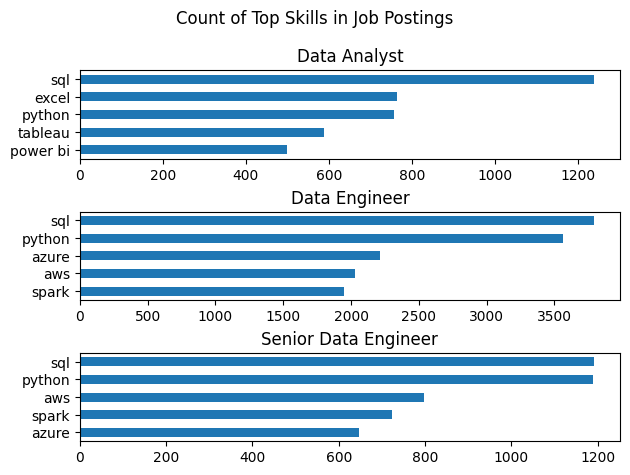

In [ ]:
fig, ax = plt.subplots(len(job_titles_top3), 1)

for i, job_title in enumerate(job_titles_top3):
  # Get top 5 skills for the job
  df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
  # plot each job title
  df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)

  ax[i].invert_yaxis()
  ax[i].set_ylabel('')
  ax[i].legend().remove()

fig.suptitle('Count of Top Skills in Job Postings')
plt.tight_layout(h_pad=0.5)
plt.show()

### Convert Count to Percentages

By converting the count to percetnages we can show what portions of the jobs are requesting the skills

To get the percentage
1. Get total number of job postings for the job

2. skill count in job posting divided by total number of job



In [ ]:
df_job_title_count = df_CAN['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,5828
1,Data Analyst,2365
2,Data Scientist,1825
3,Senior Data Engineer,1776
4,Software Engineer,1254
5,Business Analyst,1109
6,Senior Data Scientist,589
7,Machine Learning Engineer,566
8,Senior Data Analyst,435
9,Cloud Engineer,282


Join the tables together

In [ ]:
df_skill_perc = pd.merge(df_skill_count, df_job_title_count, how='left', on='job_title_short')

df_skill_perc['skill_percent'] = 100 * df_skill_perc['skill_count'] / df_skill_perc['jobs_total']

df_skill_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,3794,5828,65.099520
1,python,Data Engineer,3567,5828,61.204530
2,azure,Data Engineer,2217,5828,38.040494
3,aws,Data Engineer,2030,5828,34.831846
4,spark,Data Engineer,1948,5828,33.424846
...,...,...,...,...,...
1480,no-sql,Cloud Engineer,1,282,0.354610
1481,no-sql,Business Analyst,1,1109,0.090171
1482,mattermost,Senior Data Analyst,1,435,0.229885
1483,webex,Data Scientist,1,1825,0.054795


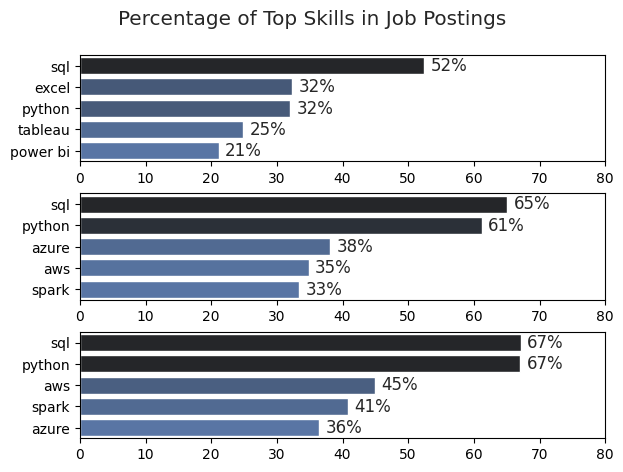

In [ ]:
fig, ax = plt.subplots(len(job_titles_top3), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles_top3):
  # Get top 5 skills for the job
  df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
  # plot each job title
  sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count' , palette='dark:b_r')

  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].legend().remove()
  ax[i].set_xlim(0,80)

  for n, v in enumerate(df_plot['skill_percent']):
    ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Percentage of Top Skills in Job Postings')
plt.tight_layout(h_pad=0.5)
plt.show()